In [1]:
import numpy as np
import matplotlib.pyplot as plt


# La Transformada Discreta de Fourier (DFT)

La transformada discreta de Fourier (DFT) convierte una secuencia finita de muestras equidistantes de una función en una secuencia de igual longitud de muestras equidistantes de la transformada de Fourier de tiempo discreto (DTFT), que es una función de frecuencia de valor complejo. El intervalo de muestreo de la DTFT es el inverso de la duración de la secuencia de entrada.

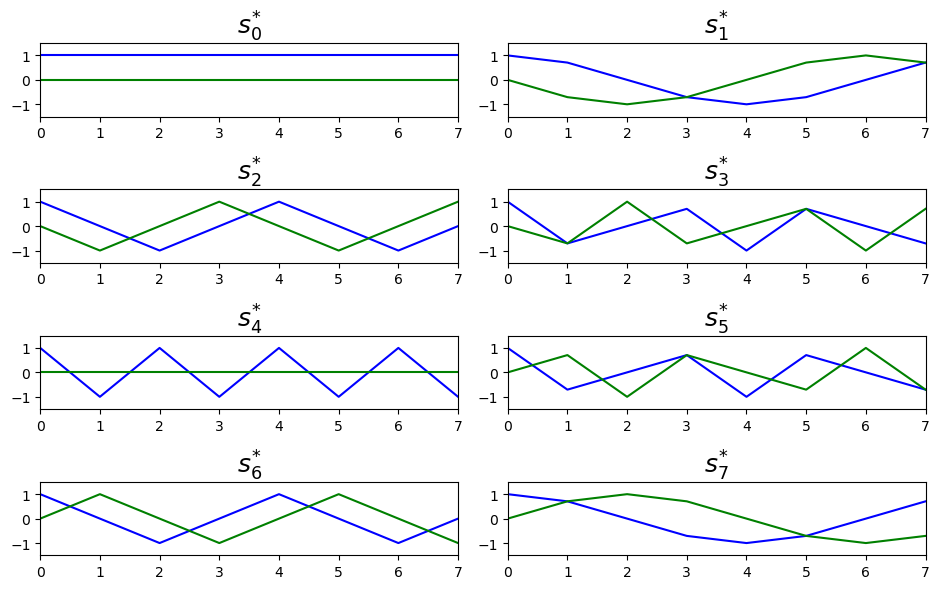

In [23]:
import matplotlib.pyplot as plt
import numpy as np

N = 8
plt.figure(1, figsize=(9.5, 6))
for k in range(N):
	s = np.exp(-1j*2*np.pi*k/N*np.arange(N))
	plt.subplot(round(N/2), 2, k+1)
	plt.plot(np.real(s), 'b', lw=1.5)
	plt.axis([0,round(N-1),-1.5,1.5])
	plt.title(r"$s^{*}_{%s}$"%(k), fontsize=18)
	plt.subplot(round(N/2), 2, k+1)
	plt.plot(np.imag(s), 'g', lw=1.5)
	plt.axis([0,N-1,-1.5,1.5])

plt.tight_layout()
plt.savefig('complex-sinewaves.png')
plt.show()


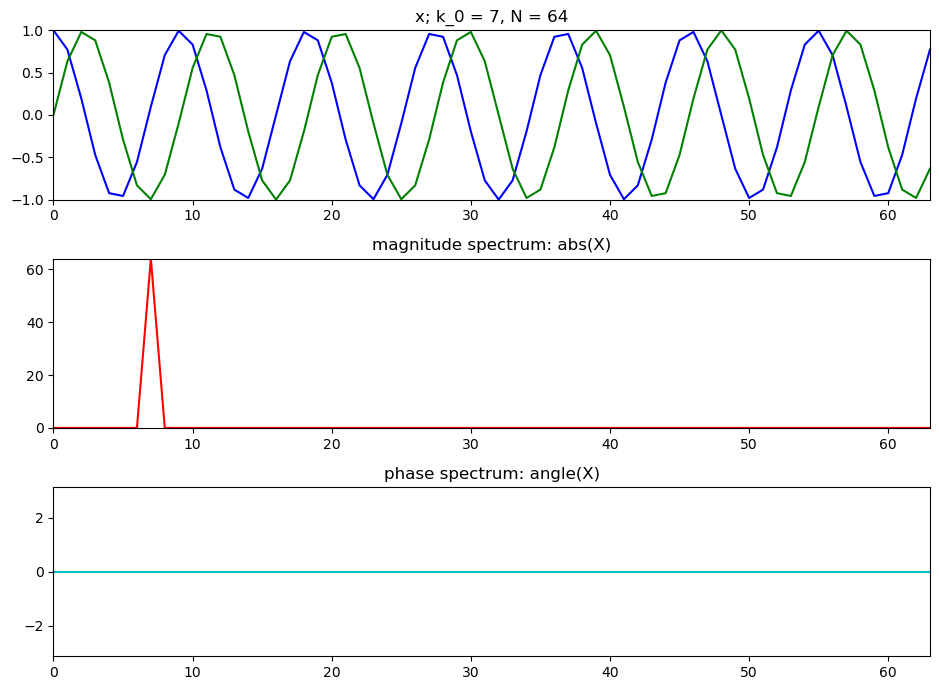

In [18]:
# j, k = np.meshgrid(np.arange(n), np.arange(n))
# dft = np.power(w, j * k)
# dft = np.real(dft)

# plt.imshow(dft)

# Eliminación de ruido de datos con FFT

Existen diversas técnicas para eliminar el ruido de una señal:

- Realizar la Transformada Rápida de Fourier
- Filtrar el ruido
- Visualizar los resultados
- Eliminación de ruido de datos reales mediante un umbral de potencia
- Filtro basado en Obspy

La serie de Fourier para una función de tiempo arbitraria $f(t)$ definida en el intervalo $((-T/2 < t < T/2 ))$ es:

$$f(t) = a_0 + \sum_{n=1}^{\infty} a_n cos(\frac{2n\pi t}{T}) + \sum_{n=1}^{\infty} b_n sen(\frac{2n\pi t}{T})$$

En la ecuación anterior, podemos ver que $cos(\frac{2n\pi t}{T})$ y $sin(\frac{2n\pi t}{T})$ son periódicos con periodo. $\frac{T}{n}$ o frecuencia $\frac{n}{T}$. Aquí, los valores mayores de n corresponden a periodos más cortos o frecuencias más altas.

En esta parte, utilizaremos el análisis de Fourier para filtrar, suponiendo que el ruido se superpone a las señales en el dominio temporal, pero no en el dominio frecuencial.

In [3]:
plt.rcParams['figure.figsize'] = [10,6]

In [4]:
# Crear señal sinética 
dt = 0.001
t = np.arange(0, 1, dt)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) # Sum of 2 Sequencies
signal_clean = signal
signal = signal + 2.5 * np.random.randn(len(t)) # Add some noise
min_signal, max_signal = signal.min(), signal.max()

Creamos nuestra señal sumando dos funciones seno con diferentes frecuencias (50 Hz y 120 Hz). Luego, creamos una matriz de ruido aleatorio y la apilamos sobre la señal.

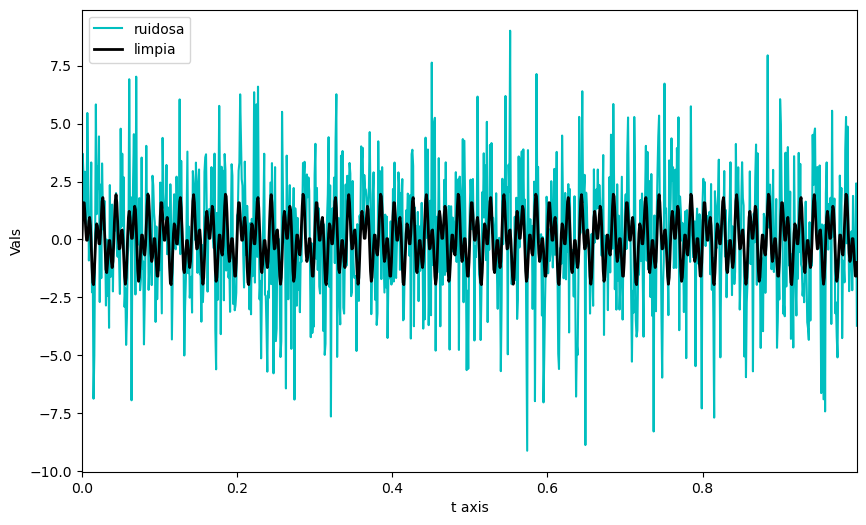

In [5]:
plt.plot(t, signal, color='c', linewidth=1.5, label='ruidosa')
plt.plot(t, signal_clean, color='k', linewidth=2, label='limpia')
plt.xlim(t[0], t[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

# Perform Fast Fourier Transform

In [6]:
# Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(signal, n)                 # Compute the FFT
psd = fhat * np.conj(fhat) / n          
freq = (1 / (dt * n)) * np.arange(n)    # frequency array
idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  # first half index

La función `fft.fft` de Numpy devuelve la Transformada de Fourier discreta unidimensional mediante el eficiente algoritmo de la Transformada Rápida de Fourier (FFT). La salida de la función es compleja y la multiplicamos por su conjugado para obtener el espectro de potencia de la señal ruidosa. Creamos la matriz de frecuencias utilizando el intervalo de muestreo (`dt`) y el número de muestras (`n`).

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


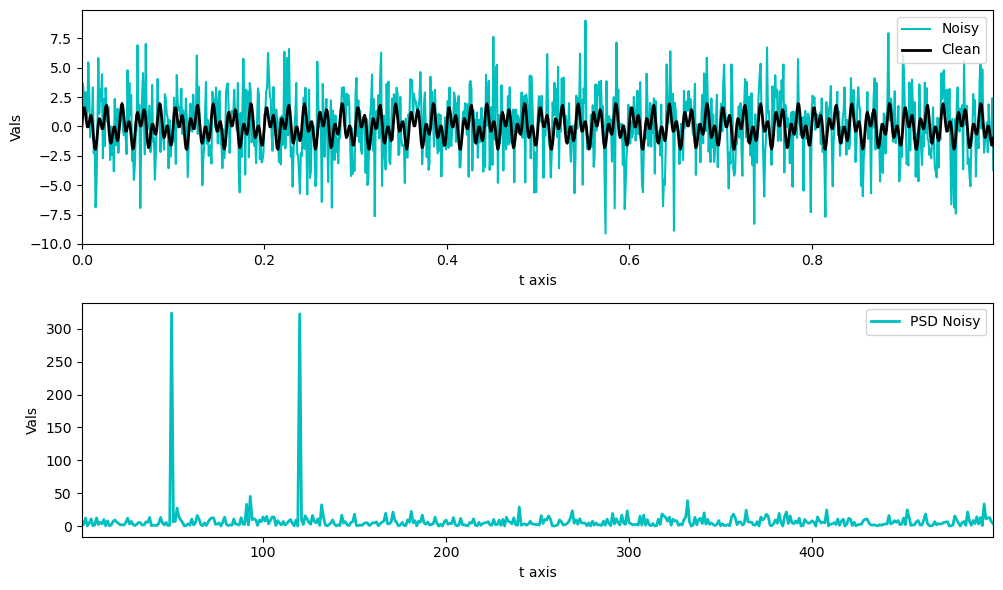

In [7]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, signal, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, signal_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], psd[idxs_half], color='c', linewidth=2, label='PSD Noisy')
plt.xlim(freq[idxs_half[0]], freq[idxs_half[-1]])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

# Filtrar el ruido

En el gráfico anterior, podemos ver que las dos frecuencias de nuestra señal original sobresalen. Ahora, podemos crear un filtro que elimine todas las frecuencias con una amplitud inferior a nuestro umbral.

In [8]:
threshold = 100
psd_idxs = psd > threshold # array of 0 and 1
psd_clean = psd * psd_idxs # zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat # used to retreive the signal

signal_filtered = np.fft.ifft(fhat_clean) # inverse fourier transform

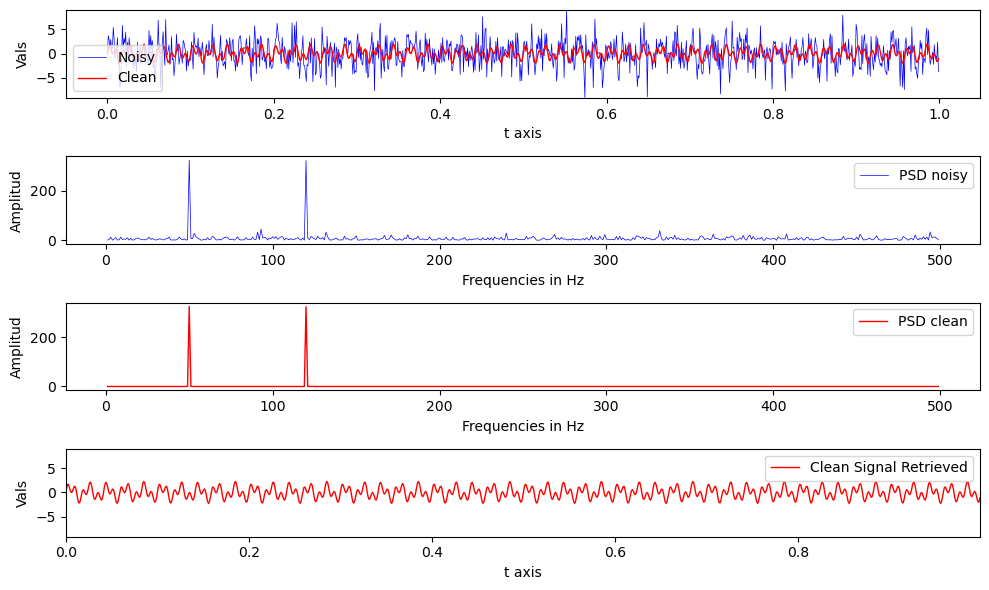

In [9]:
# plt.rcParams['figure.figsize'] = [8,10]
fig, axs = plt.subplots(4, 1)

plt.sca(axs[0])
plt.plot(t, signal, color='b', linewidth=0.5, label='Noisy')
plt.plot(t, signal_clean, color='r', linewidth=1, label='Clean')
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', linewidth=0.5, label='PSD noisy')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitud')
plt.legend()

plt.sca(axs[2])
plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', linewidth=1, label='PSD clean')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitud')
plt.legend()

plt.sca(axs[3])
plt.plot(t, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved')
plt.xlim(t[0], t[-1])
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

# Derivada espectral

In [10]:
n = 64
L = 30
dx = L / n
x = np.arange(-L/2, L/2, dx, dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x, 2) / 25) # Function
df = -(np.sin(x) * np.exp(-np.power(x, 2) / 25) + (2 / 25) * x * f) # Derivative

In [11]:
# Approximate derivative using finite differences
dfFD = np.zeros(len(df), dtype='complex_')
for kappa in range(len(df) - 1):
    dfFD[kappa] = (f[kappa+1] - f[kappa]) / dx
    
dfFD[-1] = dfFD[-2]

In [12]:
# Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2 * np.pi / L) * np.arange(-n/2, n/2)
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

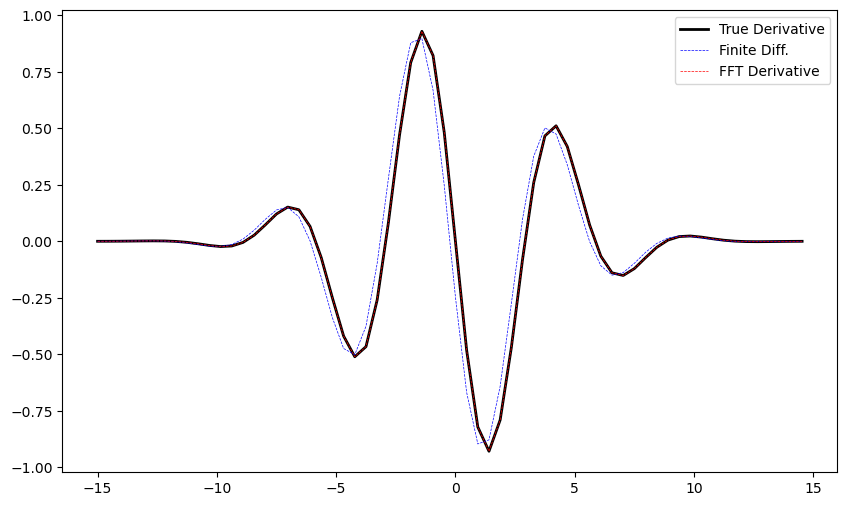

In [13]:
# plt.rcParams['figure.figsize'] = [12,6]
plt.plot(x, df.real, color='k', linewidth=2, label='True Derivative')
plt.plot(x, dfFD.real, '--', color='b', linewidth=0.5, label='Finite Diff.')
plt.plot(x, dfFFT.real, '--', color='r', linewidth=0.5, label='FFT Derivative')
plt.legend()

# Spectrogram (Gabor Transform)

- A spectrogram is like a photograph or image of a signal
- A spectrogram plot tiempo in Y-axis and frequencies in X-axis.
- A spectrogram also conveys the signal strength using the colors - brighter the color the higher the energy of the signal.
- A spectrogram explains how the signal strength is distributed in every frequency found in the signal.

---
Measuring the frequency and Amplitud of the signals can be considered the main motive of the spectrogram. For visualising signals into an image, we use a spectrogram that plots the tiempo in the x-axis and frequency in the y-axis and, for more detailed information, Amplitud in the z-axis. Also, it can be on different colors where the density of colors can be considered the signal's strength. Finally, it gives you an overview of the signal where it explains how the strength of the signal is distributed in different frequencies.

So the Amplitud and the frequency of the signal are the two main components of any spectrogram. 

- Frequency: Mathematically, frequency is the number of waves passing through a fixed point in a single tiempo unit or the number of cycles performed by a body in a single tiempo when it is in a periodic motion.

- Amplitud: Amplitud can be defined as the greatest distance travelled by a moving body in a periodic motion in a single tiempo unit or the highest distance of the wave on dips down or rising from its flat surface.

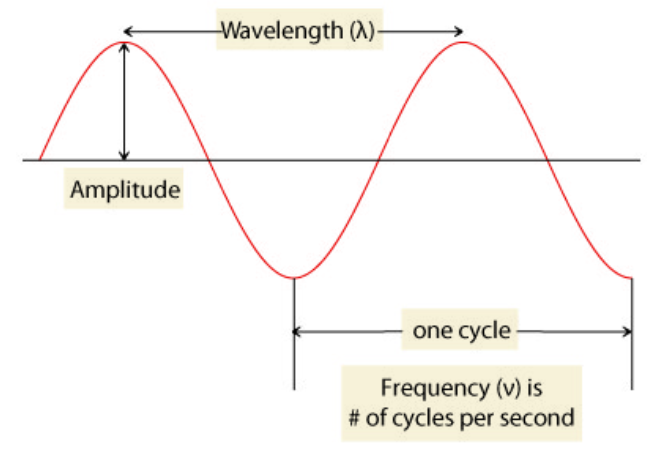

[source](https://lightcat-files.s3.amazonaws.com/problem_images/af49016fd63588d9-1593714092882.jpg)

The mathematics behind the spectrogram is based on the Gabor transform. We use the Gabor transform to compute the spectrogram. Gabor transform is the special case of the short-tiempo Fourier transform used to extract the sinusoidal frequency and phase content of a signal in its particular section. 

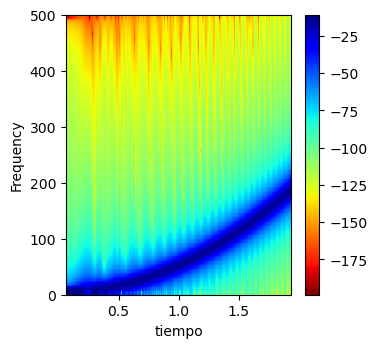

In [14]:
dt = 0.001
t = np.arange(0, 2, dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2 * np.pi * t * (f1 - f0) * np.power(t, 2) / (3 * t1 ** 2))

fs = 1 / dt

# plt.rcParams['figure.figsize'] = [8,6]
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet_r')
plt.xlabel('tiempo')
plt.ylabel('Frequency')
plt.colorbar()

# Image Compression with Wavelets

In [15]:
# length = min(10 * width[ii], len(data))
# cwt[ii,:] = signal.convolve(data, np.conj(wavelet(length, width[ii],
#                                 **kwargs))[::-1], mode='same')

/var/folders/30/ztpkmkzs3x93tr0tmbtvxwy80000gn/T/ipykernel_2974/260344938.py:9: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwtmatr = signal.cwt(sig, signal.ricker, widths)


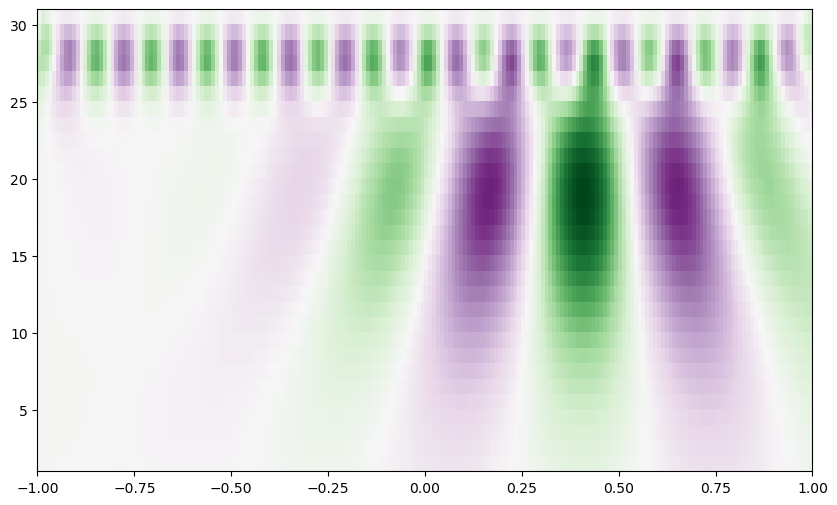

In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

## References:
- [Frequency Domain - DeepAI](https://deepai.org/machine-learning-glossary-and-terms/frequency-domain)

- [Fourier Transforms With scipy.fft: Python Signal Processing](https://realpython.com/python-scipy-fft/)

- [Signal denoising using Fourier Analysis in Python (codes included)](https://www.earthinversion.com/techniques/signal-denoising-using-fast-fourier-transform/)

- [Hands-On Tutorial on Visualizing Spectrograms in Python](https://analyticsindiamag.com/hands-on-tutorial-on-visualizing-spectrograms-in-python/)

In [17]:
import tensorflow as tf
import timeit

print("seconds (lower is better):")
print(f"Tensorflow {tf.__version__}", timeit.timeit('X = tf.signal.rfft(x)', setup='import tensorflow as tf; x = tf.random.normal([50000, 512])', number=10))
print("Numpy: ", timeit.timeit('X = numpy.fft.rfft(x)', setup='import numpy.fft; import tensorflow as tf; x = tf.random.normal([50000, 512])', number=10))
print("Jax: ", timeit.timeit('jnp.fft.rfft(x).block_until_ready()', setup='import jax.numpy as jnp; import tensorflow as tf; x = tf.random.normal([50000, 512]).numpy()', number=10))
print("Scipy: ", timeit.timeit('scipy.fft.rfft(x)', setup='import scipy; import tensorflow as tf; x = tf.random.normal([50000, 512]).numpy()', number=10))
print("Scipy (parallelization): ", timeit.timeit('scipy.fft.rfft(x, workers=-1)', setup='import scipy; import tensorflow as tf; x = tf.random.normal([50000, 512]).numpy()', number=10))


ModuleNotFoundError: No module named 'tensorflow'

# Wavelet Transform Analysis of 1-D Signals

- Single Level Discrete Wavelet Transform and Inverse Transform

In [ ]:
import pywt

x = [3, 7, 1, 1, -2, 5, 4, 6] # Signal
cA, cD = pywt.dwt(x, 'haar') # Wavelet Transform

y = pywt.idwt(cA, cD, 'haar') # Inverse Wavelet Transform

print(cA) # Printing Approximation Coeffs.
print(cD) # Printing Detailed Coeff.
print(y)  # Printing Reconstructed Signal.

In [ ]:
# Example Code for wavedec() and waverec()
# Multi-Level Discrete Wavelet Transform and Inverse Transform

x = [3, 7, 1, 1, -2, 5, 4, 6, 6, 4, 5, -2, 1, 1, 7, 3] # Signal

coeffs = pywt.wavedec(x, 'db1', level=2, mode='periodic') # DWT
cA2, cD2, cD1 = coeffs

y = pywt.waverec(coeffs, 'db1', mode='periodic') # IDWT

print(f"cA2 = {cA2}")
print(f"cD2 = {cD2}")
print(f"cD1 = {cD1}")
print(f"Reconstructed Signal = {y}")

In [ ]:
ca

In [ ]:
y
